In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report)

### Dataset Description
The dataset has Number 768 sample records of patients. There are 8 features:


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction	
- Age: Years

Using these 8 predictor variables we need to predict the target variable 'Outcome'. It contains binary value: 1 if the patient has diabetes and 0 if the patient doesn't have diabetes.

In [20]:
dataset = pd.read_csv("diabetes.csv")

In [21]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Data Processing

In [23]:
X = dataset.drop('Outcome', axis=1).to_numpy()
y = dataset['Outcome'].to_numpy()

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=99)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training logistic Regression Model

In [24]:
logReg = LogisticRegression(class_weight= 'balanced', max_iter=500)
logReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [25]:
# Prediction

y_pred = logReg.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

### Evaluation Metrics

Now that we have predicted whether or not the patients in the test set have diabetes, let's evaluate how good is the prediction made by logistic regression. We can evaluate the performance of the classifier using various metrics. We will learn about the following metrics.
 
 
 - Confusion Matrix
 - Accuracy
 - Precision
 - Recall
 - F1-score 

All of these metrics are available in Scikit-Learn's [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) package  for [classification](https://scikit-learn.org/stable/modules/classes.html#classification-metrics).

Note: Confusion matrix is not a performance metric in itself but most of the other performance metrics can be derived from the confusion matrix.

The matrix displays the number of instances produced by the model on the test data.

- True positives (TP): occur when the model accurately predicts a positive data point.
- True negatives (TN): occur when the model accurately predicts a negative data point.
- False positives (FP): occur when the model predicts a positive data point incorrectly.
- False negatives (FN): occur when the model mispredicts a negative data point.

### 1. Accuracy
The simplest performance metric for classification models is accuracy, expressed as
$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{TP + TN}{TP+FP+TN + FN} $$

It is the fraction of predictions that the classifier predicted correctly in the entire testing dataset. This metric only cares for the correct predictions while neglecting the false predictions. Thus is of interest in cases where true positives and true negatives have greater importance than false postitives and false negatives.

We can calculate the accuracy using the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module.


In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Our model is {accuracy*100:.3f}% accurate")


Our model is 77.273% accurate


### Accuracy Paradox

Accuracy paradox refers to the inability of accuracy metric to correctly measure the performance in case of skewed classes. Classes are skewed if a large number of examples belong to one class and only a small number of examples belong to the other class.

**Example**

Consider a problem where the model needs to detect cancer patients. Suppose it is a very rare type of cancer and only 1% of the tested people can have it. We built a model and found its accuracy to be 90%. However, if we build a model that simply classifies every test sample as negative, it will have an accuracy of 99%. If we deploy this model in our lab by considering it's accuracy only, this would result in a catastrophe as no any cancer patient would be detected.

Thus, at first, we need to check the skewness of the dataset.

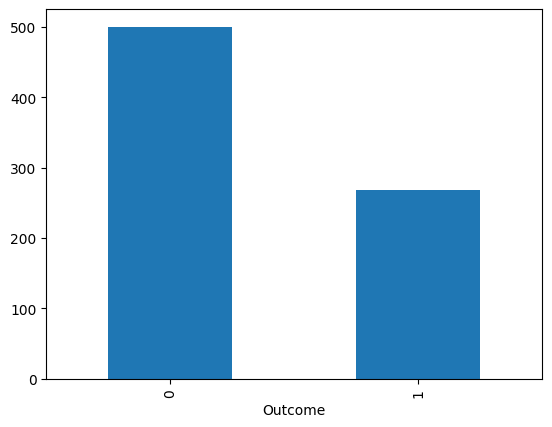

In [27]:
dataset['Outcome'].value_counts().plot.bar()
plt.show()

As you can see from the plot above, our dataset is quite skewed. The number of patients that do not have diabetes (0) is double the number of patients that have diabetes (1). This indicates that accuracy alone is not a dependable metric to measure the model's performance. Can you answer why? (Hint: compute the accuracy when our model predicts 0 only.)

#### Metrics Confusion Matrix

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

A confusion matrix is a 2d array as shown below. The rows of the matrix represent the instances of the true classes, while the columns represent the instances of predicted classes. That is to say, given a confusion matrix $C$, the entry $c_{i,j}$ is the number of observations known to belong to class $i$ but predicted to be in class $j$. 

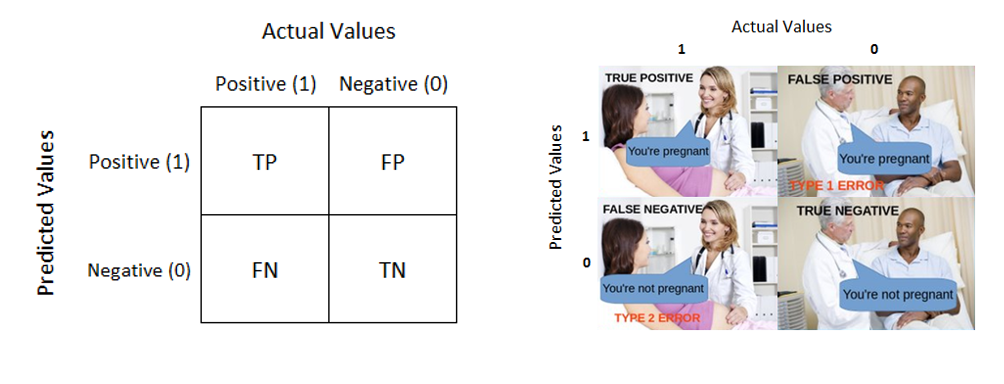

**TN (True Negative)** is the number of examples that our classifier predicted as negative $(\hat{y} = 0)$ and are actually negative $(y = 0)$.

**FN (False Negative)** is the number of examples that our classifier predicted as negative $(\hat{y} = 0)$ but are actually positive $(y = 1)$.

**TP (True Positive)** is the number of examples that our classifier predicted as positive $(\hat{y} = 1)$ and are actually positive $(y = 1)$.

**FP (False Positive)** is the number of examples that our classifier predicted as positive $(\hat{y} = 1)$ but are actually negative $(y = 0)$.

The false positives is called **Type I error** while the false negatives are  called **Type II error**. The diagonal of the confusion matrix contains the TN and TP. These are the values that the classifier got right. So greater the values in the diagonal, better the classifier's performance.

We can use the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to compute the confusion matrix. The information provided by the confusion matrix can be used for the computation of accuracy, precision, recall, and F1 score.

In [28]:
cm = confusion_matrix(y_test, y_pred)

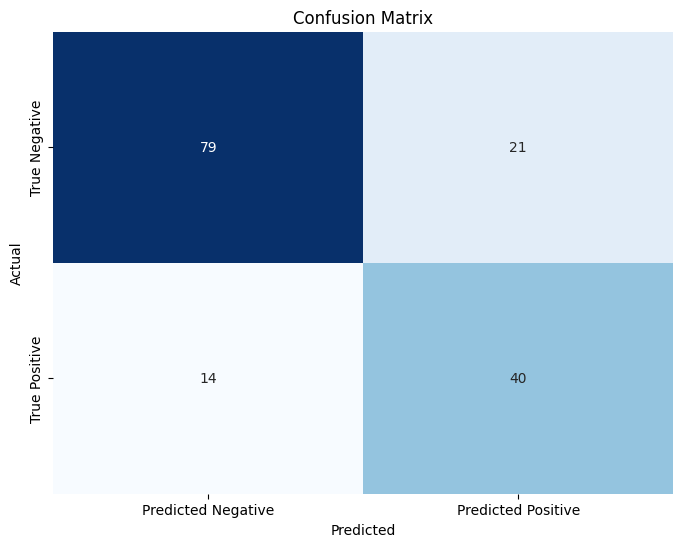

In [29]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Here analyzing above confusion matrix:
- TN = 79; 79 negative examples were correctly predicted as negative
- FP = 21; 21 negative examples were incorrectly predicted as positive
- FN = 14; 14 positive examples were incorrectly predicted as negative
- TP = 40; 40 positive examples were correctly predicted as positive.


<br>

### 2. Precision
Precision is a measure of how accurate a model’s positive predictions are. It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model.

$$\text{Precision} = \frac{\text{True Positive}}{\text{Total number of positives predicted}} = \frac{TP}{TP+FP}$$

Precision is the fraction of the correct predictions among the predicted positives. It is also called _positive predictive value_. It will yield a high value if the number of false positives is low. Thus this metric is particularly significant when there is a high penalty associated with false positive (Type I error) predictions. 

Even though we can compute the precision from the confusion matrix, `sklearn` provides an easier way to compute the precision. We can use the [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to directly compute the precision of our logistic regression classifier. 


In [30]:
precision = precision_score(y_test, y_pred)
print(precision)

0.6557377049180327


As you can see, our classifier has a precision of 0.6557 which means that among the patients that the classifier has positively predicted of having diabetes, only 65.57% of patients actually have diabetes.

### 3. Recall
Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.

$$\text{Recall} =  \frac{\text{True Positive}}{\text{Total number of actual positives}} = \frac{TP}{TP + FN}$$

Note: We use precision when we want to minimize false positives, crucial in scenarios like spam email detection where misclassifying a non-spam message as spam is costly. And we use recall when minimizing false negatives is essential, as in medical diagnoses, where identifying all actual positive cases is critical, even if it results in some false positives.

Recall is also termed _sensitivity_ or the _true positive rate_ as it is the fraction of correct predictions among the actual positive instances of a class. It is high when the false-negatives (Type II error) are low. Hence, this metric is useful when there is a high penalty for committing Type II error. 

For instance, an algorithm used for predicting a fraudulent bank transaction is more sensitive to accepting a fraudulent transaction as a legitimate one (false-negative) than accepting a legitimate transaction as fraudulent (false negative).

We can calculate the recall from the confusion matrix as well but here we will use the [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) function from the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the recall of our classifier.

In [31]:
recall = recall_score(y_test, y_pred)
print(recall)

0.7407407407407407


The classifier has a recall of 0.7407 which means that among the patients that have diabetes, the classifier can only identify 740.7% of them. Can you think of the consequences?

Hint: Think about those who have diabetes and don't take any medication as they are diagnosed incorrectly.

### 4. F1-Score
F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall,

$$\text{F1-Score} = \frac{\text{2*Precision*Recall}}{\text{Precision + Recall}} $$

\begin{align*}
\text{F1 score} = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision}  + \text{Recall}}
\end{align*}

We balance precision and recall with the F1-score when a trade-off between minimizing false positives and false negatives is necessary, such as in information retrieval systems.

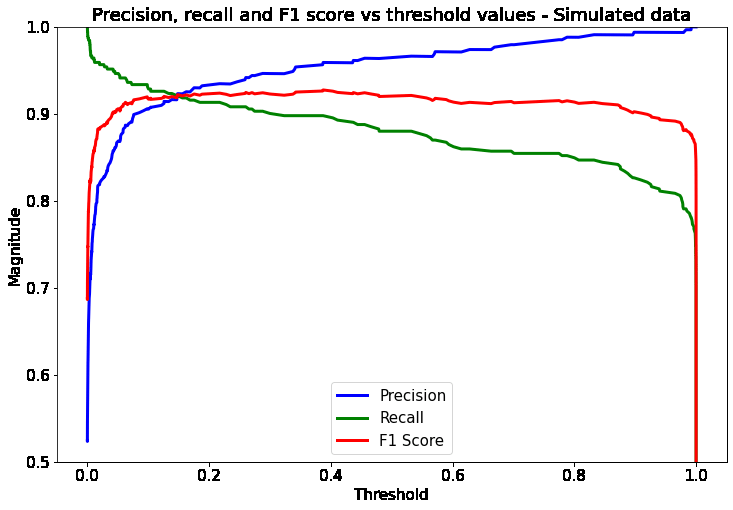

In [32]:
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.6956521739130435


F1 Score is low when either the _precision_ or _recall_ is low, and high if both metrics are high. When the precision and recall values are equal, F1 score will be maximum. If our classifier needs to have a balance between precision and recall then we can use the F1 Score. It is also a useful metric as it gives a single value that is representative of both _precision_ and _recall_. F1 Score metric is useful when 
- the false positives and false negatives are costly
- the instances of true negatives are more
- increase in the data size doesn't make any difference in the outcome.